

# <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:center;border-radius:40px 40px;">Detección de Tumores Cerebrales</p>
###   <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:center;border-radius:40px 40px;">Proyecto Modelado Predictivo</p>

#####   <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:left;border-radius:40px 40px;">Integrantes:</p>
#####   <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:left;border-radius:40px 40px;">1. De Luna Ocampo Yanina</p>
#####   <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:left;border-radius:40px 40px;">2. Ramírez Méndez Kevin</p>
#####   <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:left;border-radius:40px 40px;">3. Sainz Takata Juan Pablo Minoru</p>
#####   <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:left;border-radius:40px 40px;">4. Vázquez Portuguez José Antonio</p>

#### <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:left;border-radius:40px 40px;">Descripción del conjunto de datos</p>

Los datos de imagen que se usaron para este problema son [Imágenes de resonancia magnética cerebral para la detección de tumores cerebrales](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri). Consiste en resonancias magnéticas de cuatro clases:

* `no_tumor` 
* `glioma_tumor` 
* `meningioma_tumor` 
* `pituitary_tumor` 

#### <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:left;border-radius:40px 40px;">Información Relevante sobre el data set</p>
1. Desafortunadamente, la descripción del conjunto de datos no contiene ninguna información de dónde provienen estas imágenes de resonancia magnética.
2. No cuenta con muchas imágenes.
3. si

#### <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:left;border-radius:40px 40px;">¿Qué es un tumor cerebral?</p>

> Un tumor cerebral ocurre cuando se forman células anormales dentro del cerebro. Hay dos tipos principales de tumores: tumores cancerosos (malignos) y tumores benignos. Los tumores cancerosos se pueden dividir en tumores primarios, que comienzan dentro del cerebro, y tumores secundarios, que se han diseminado desde otros lugares, conocidos como tumores de metástasis cerebral. Todos los tipos de tumores cerebrales pueden producir síntomas que varían según la parte del cerebro involucrada. Estos síntomas pueden incluir dolores de cabeza, convulsiones, problemas de visión, vómitos y cambios mentales. El dolor de cabeza suele empeorar por la mañana y desaparece con los vómitos. Otros síntomas pueden incluir dificultad para caminar, hablar o con las sensaciones. A medida que avanza la enfermedad, puede ocurrir pérdida del conocimiento.
>
> ![](https://upload.wikimedia.org/wikipedia/commons/5/5f/Hirnmetastase_MRT-T1_KM.jpg)
>
> *Metástasis cerebral en el hemisferio cerebral derecho de cáncer de pulmón, mostrada en imágenes de resonancia magnética.*

Fuente: [Wikipedia](https://en.wikipedia.org/wiki/Brain_tumor)

#### <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:left;border-radius:40px 40px;">Objetivo</p>
<p> Crear un sistema automatizado en la nube que pueda facilitar la detección de tumores cerebrales contruyendo un modelo de CNN que clasificará si el individuo tiene un tumor o no, con base en una Resonancia Magnética Nuclear (RMN). </p>

#### <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:left;border-radius:40px 40px;">¿Cómo podemos lograrlo?</p>
<p> La aplicación de técnicas de clasificación automatizadas utilizando Machine Learning(ML) e Inteligencia Artificial(AI) ha mostrado consistentemente precisión más alta que la clasificación manual. </p>
<p> Podemos lograrlo mediante 3 modelos: </p>
<p> 1. CNN (Convolutional Neural Network)</p>
<p> 2. ANN (Artificial Neural Network)</p>
<p> 3. TL (Transfer Learning)</p>

# <p style="background-color:#ffffff;font-family:newtimeroman;color:#9D8CFF;font-size:150%;text-align:center;border-radius:40px 40px;"> CNN sin efficientNet </p>


#### <p style="background-color:#ffffff;font-family:newtimeroman;color:#9D8CFF;font-size:150%;text-align:center;border-radius:40px 40px;">Librerias Utilizadas</p>

In [1]:
from IPython.display import clear_output
!pip install numpy scikit-image seaborn numpy pandas opencv-python matplotlib torch torchvision pathlib scikit-image tqdm keras-tuner


In [2]:
!pip install scikit-learn

In [3]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt 
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow.keras.optimizers import Adam 
from keras.models import load_model
from kerastuner import RandomSearch
from sklearn.metrics import classification_report
import os
import torch
import glob

import pathlib
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm


import warnings
warnings.filterwarnings("ignore")

/var/folders/q4/kct2nyps4zscxdwwyqdj98fc0000gn/T/ipykernel_4814/2327914300.py:18: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch




# <p style="background-color:#ffffff;font-family:newtimeroman;color:#9D8CFF;font-size:150%;text-align:center;border-radius:40px 40px;">Construcción de Modelo con Keras</p>



#### <p style="background-color:#ffffff;font-family:newtimeroman;color:#9D8CFF;font-size:150%;text-align:left;border-radius:40px 40px;">Preparación de los datos</p>

In [7]:
train_img = []
train_labels = []

test_img = []
test_labels = []

path_train = ('./work/Training/')
path_test = ('./work/Testing/')
img_size= 300

for i in os.listdir(path_train):
    for j in os.listdir(path_train+i):
        train_img.append (cv2.resize(cv2.imread(path_train+i+'/'+j), (img_size,img_size))) 
        train_labels.append(i)
        
for i in os.listdir(path_test):
    for j in os.listdir(path_test+i):
        train_img.append (cv2.resize(cv2.imread(path_test+i+'/'+j), (img_size,img_size))) 
        train_labels.append(i)
        
train_img = (np.array(train_img))
# test_img = (np.array(test_img))

In [8]:
X_train, y_train = shuffle(train_img,train_labels, random_state=101)

In [9]:
train_img,test_img,train_labels,test_labels = train_test_split(X_train,y_train, test_size=0.2,random_state=101)

In [10]:
train_labels_encoded = [0 if category == 'no_tumor' else(1 if category == 'glioma_tumor' else(2 if category=='meningioma_tumor' else 3)) for category in list(train_labels)]
test_labels_encoded = [0 if category == 'no_tumor' else(1 if category == 'glioma_tumor' else(2 if category=='meningioma_tumor' else 3)) for category in list(test_labels)]

In [11]:
print("Shape of train: ",(train_img).shape," and shape of test: ", (test_img).shape)

Shape of train:  (2611, 300, 300, 3)  and shape of test:  (653, 300, 300, 3)





#### <p style="background-color:#ffffff;font-family:newtimeroman;color:#9D8CFF;font-size:150%;text-align:left;border-radius:40px 40px;">Aumentando los datos</p>

In [12]:

img_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

img_datagen.fit(X_train)
#img_datagen.fit(X_test)



#### <p style="background-color:#ffffff;font-family:newtimeroman;color:#9D8CFF;font-size:150%;text-align:left;border-radius:40px 40px;">Algunas Visualizaciónes</p>

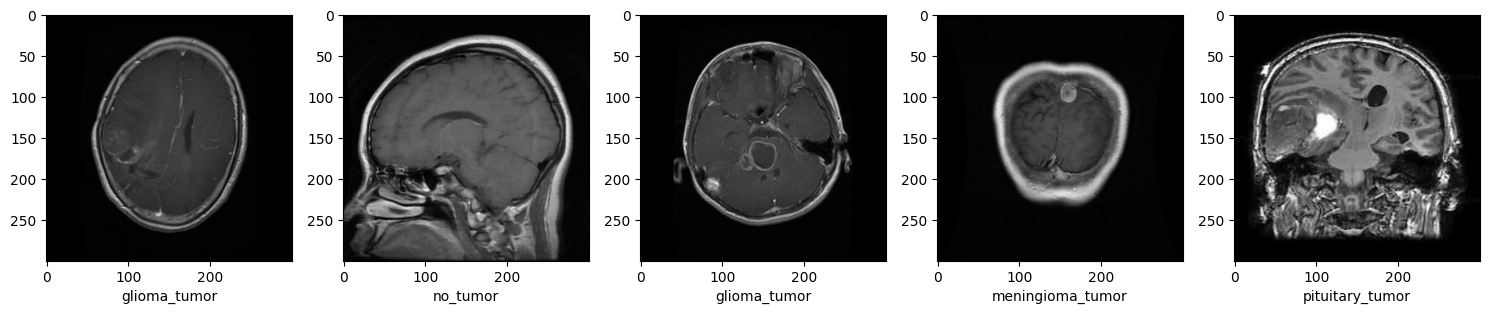

In [13]:
plt.figure(figsize = (15,15));
for i,j in enumerate(X_train):
    if i<5:
        plt.subplot(1,5,i+1)
        plt.imshow(j);
        plt.xlabel(train_labels[i]);
        plt.tight_layout()
    else:
        break

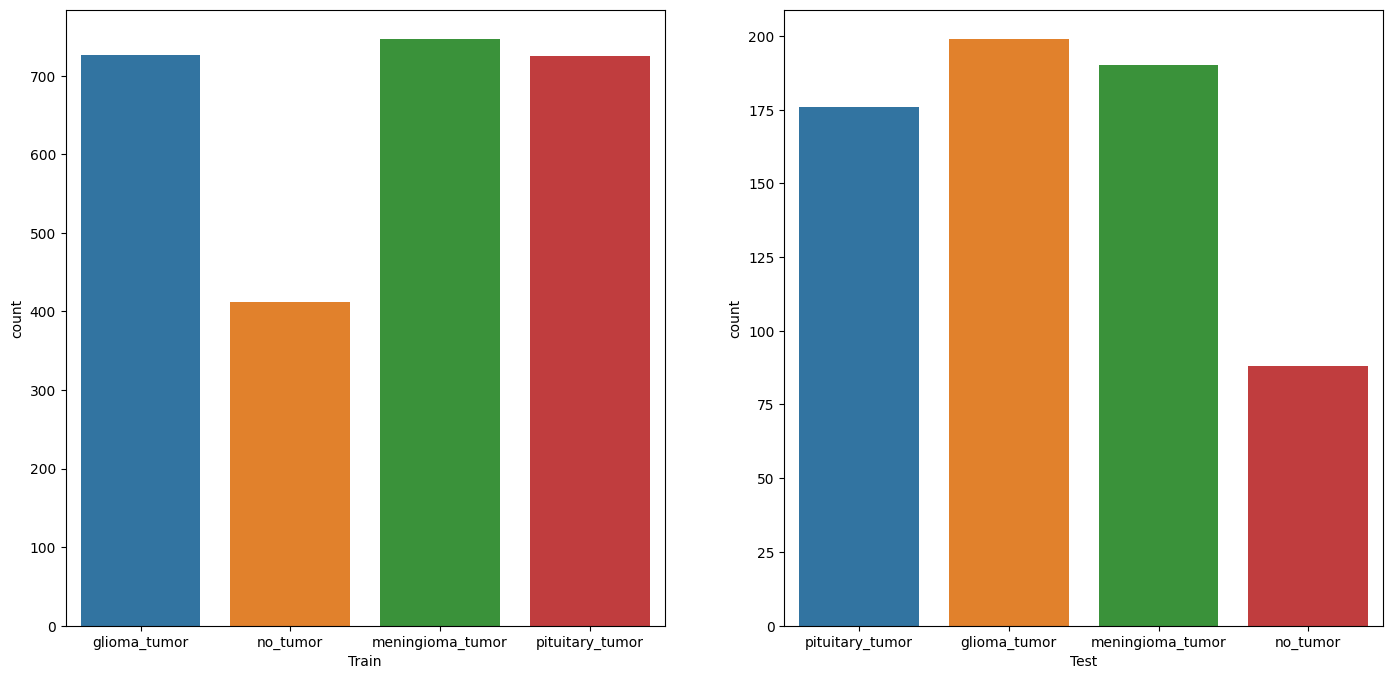

In [14]:
plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
a=sns.color_palette("rocket_r")
for i,j in enumerate([train_labels, test_labels]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])


In [15]:
model = tf.keras.Sequential(
        [
          tf.keras.layers.Conv2D(kernel_size=(5,5) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=64, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Dense(4, activation='sigmoid')
  ])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)


In [16]:
history = model.fit(tf.cast(train_img, tf.float32), np.array(pd.get_dummies(train_labels)),
                    validation_split=0.25, epochs =20, verbose=1, batch_size=32, callbacks=[checkpoint,reduce_lr, tensorboard])

Epoch 1/20
62/62 [==============================] - ETA: 0s - loss: 4.8601 - accuracy: 0.4259
Epoch 1: val_accuracy improved from -inf to 0.57734, saving model to effnet.h5
62/62 [==============================] - 74s 1s/step - loss: 4.8601 - accuracy: 0.4259 - val_loss: 0.9993 - val_accuracy: 0.5773 - lr: 0.0010
Epoch 2/20
62/62 [==============================] - ETA: 0s - loss: 0.9438 - accuracy: 0.6093
Epoch 2: val_accuracy improved from 0.57734 to 0.66003, saving model to effnet.h5
62/62 [==============================] - 79s 1s/step - loss: 0.9438 - accuracy: 0.6093 - val_loss: 0.8197 - val_accuracy: 0.6600 - lr: 0.0010
Epoch 3/20
62/62 [==============================] - ETA: 0s - loss: 0.7524 - accuracy: 0.6874
Epoch 3: val_accuracy improved from 0.66003 to 0.69525, saving model to effnet.h5
62/62 [==============================] - 79s 1s/step - loss: 0.7524 - accuracy: 0.6874 - val_loss: 0.7429 - val_accuracy: 0.6953 - lr: 0.0010
Epoch 4/20
62/62 [==============================]

#### <p style="background-color:#ffffff;font-family:newtimeroman;color:#9D8CFF;font-size:150%;text-align:left;border-radius:40px 40px;">Algunas Notas</p>
> Agregar relleno aquí para preservar la forma de la imagen

> Agregar la capa maxpool para obtener los píxeles que tienen la mayor intensidad. Reduce el tamaño de la imagen en 2.

> Tomamos filtros de 7*7 como tamaño de imagen si eran de 300 * 300, por lo que ayudaría a aprender mejor.
 
> Tomada una "drop out layer", para evitar el overfitting.

> La imagen del generador de datos es del tipo 'uint8', debe reescribirla en 'float32'.

In [17]:
filename = 'CNN_Brain_Tumor_60_20_20.h5'

In [18]:
model.save(filename)

In [19]:
model_final = load_model(filename)

21/21 [==============================] - 5s 240ms/step - loss: 0.6808 - accuracy: 0.8836
Accuracy: 88.361406


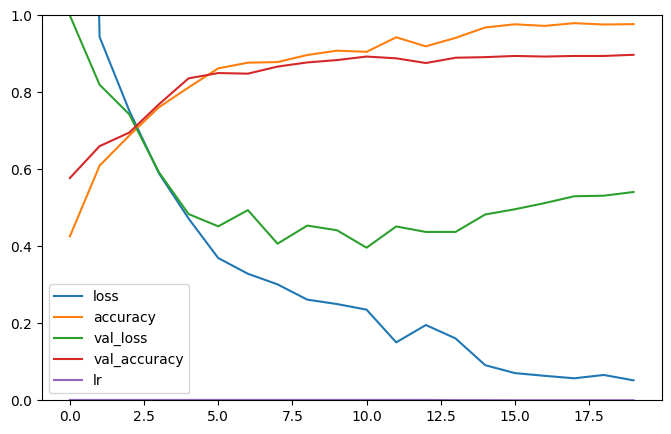

In [20]:
# change directory
#os.chdir(r'../input/brain-tumor-classification-mri')
#print(os.getcwd())

#save the model
#model.save('/kaggle/working/EfficientNetB3.h5')
#model.save_weights('/kaggle/working/EfficientNetB3_weights.h5')

#plot loss and accuracy
pd.DataFrame(history.history).plot(figsize=(8, 5))
#plt.grid(True)

#plt.gca().set_xlim(0,33)
plt.gca().set_ylim(0,1)
# # plt.savefig('/kaggle/working/EfficientNetB3.png')
loss, accuracy = model.evaluate(tf.cast(test_img, tf.float32), np.array(pd.get_dummies(test_labels)))

# #print accuracy    
print('Accuracy: %f' % (accuracy*100))

In [21]:
lb = LabelEncoder()
labels_train=lb.fit(train_labels)
pred=np.argmax(model.predict(test_img),axis=1)
pred_labels=lb.inverse_transform(pred) #predicted labels
val_y_lab = lb.transform(test_labels)

21/21 [==============================] - 4s 199ms/step


Text(98.2222222222222, 0.5, 'Predicted class')

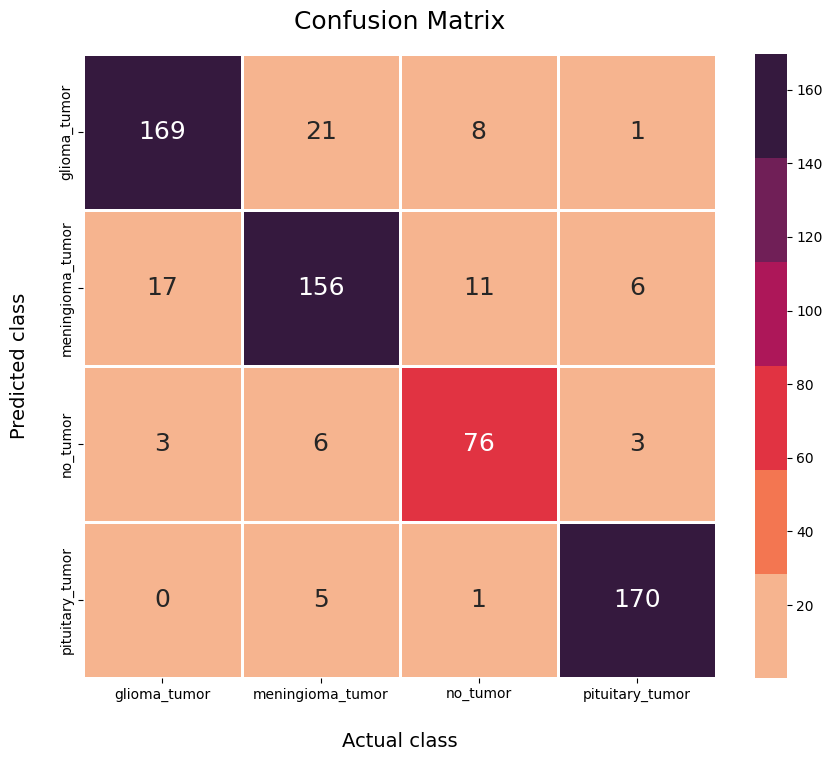

In [22]:
classes = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

cm = confusion_matrix(val_y_lab,pred)

fig,ax= plt.subplots(figsize=(10.2,8.1))
a=sns.color_palette("rocket_r")  #_r inverts the palette
sns.heatmap(cm, annot=True,fmt='g',linewidths=1,linecolor='white',robust=True,annot_kws={"size":18},cmap=a)
 #annot_kws: settings about annotations
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);
plt.yticks(va="center")
plt.title('Confusion Matrix',fontsize=18,pad=18)
plt.xlabel('Actual class',labelpad=22,fontsize=14)
plt.ylabel('Predicted class',labelpad=22,fontsize=14)
#plt.savefig(os.path.join('plots/','EfficientNetB3_confusion_matrix.png'), dpi=300)

In [23]:
print(classification_report(val_y_lab,pred,target_names=classes))

                  precision    recall  f1-score   support

    glioma_tumor       0.89      0.85      0.87       199
meningioma_tumor       0.83      0.82      0.83       190
        no_tumor       0.79      0.86      0.83        88
 pituitary_tumor       0.94      0.97      0.96       176

        accuracy                           0.87       653
       macro avg       0.87      0.87      0.87       653
    weighted avg       0.88      0.87      0.87       653



# <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:center;border-radius:40px 40px;">Construcción de Modelo con CLASIFICADOR CONVNET</p>

In [24]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True) #automatically restarts kernel

{'status': 'ok', 'restart': True}

: 

In [1]:
#Check if GPU is used
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print(f'Found GPU at: {device_name}')
else :
  print(f'Found GPU at: {device_name}')

SystemError: GPU device not found

# <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:center;border-radius:40px 40px;">Librerias Utilizadas</p>

In [6]:
#data manipulation
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import os

#image manipulation
from PIL import Image
import cv2

#maths
import numpy as np
from scipy.stats import kstest, norm, mode
import statistics as st

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#models
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix

#logs beautifier and configs
from IPython.display import display, Markdown, Latex, clear_output
from tqdm import tqdm #tqdm means "progress" in Arabic (taqadum, تقدّم) and is an abbreviation for "I love you so much" in Spanish (te quiero demasiado) :0
from warnings import filterwarnings
#import ipywidgets as widgets
import io

In [11]:
img_folder_path = './work/'
effnet_arc_img_path = '/content/drive/MyDrive/ModeladoPredicitivo/Keras-arch/CNN_EficcientNet_Model_Arc/CNN_EficcientNet_Model_Arc.png'
#The function that uses this parameter needs a folder to save variables, weights, etc
effnet_model_persistence_path = '/content/drive/MyDrive/ModeladoPredicitivo/CNN-models/CNN_EficcientNet_Model'
ann_persistence_path = "/content/drive/MyDrive/ModeladoPredicitivo/CNN-models/ANN_Model/ann.h5"
ann_arc_img_path = '/content/drive/MyDrive/ModeladoPredicitivo/Keras-arch/ANN_Model_Arc/ANN_Model_Arc.png'

# <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:center;border-radius:40px 40px;">Utilidades</p>

In [8]:
def count_classes(labels,y_train):
  counts = np.zeros((len(labels),), dtype=int)
  for i in range(len(y_train)):
    if y_train[i] == labels[0]:
      counts[0] += 1
    if y_train[i] == labels[1]:
      counts[1] += 1
    if y_train[i] == labels[2]:
      counts[2] += 1
    if y_train[i] == labels[3]:
      counts[3] += 1
  return counts

def print_images_from_classes(title,labels,X,y):
  fig, ax = plt.subplots(1,4,figsize=(20,20))
  fig.text(s=title,size=18,fontweight='bold',
              fontname='monospace',y=0.62,x=0.4,alpha=0.8)
  for k, i in enumerate(labels):
    j=0
    while True :
        if y[j]==i:
            ax[k].imshow(X[j])
            ax[k].set_title(y[j])
            ax[k].axis('off')
            break
        j+=1

#uploader = widgets.FileUpload()
#display(uploader)
def img_pred(upload,image_size):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(image_size,image_size))
    img = img.reshape(1,image_size,image_size,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='Glioma Tumor'
    elif p==1:
        print('No hay Tumor')
    elif p==2:
        p='Meningioma Tumor'
    else:
        p='Pituitary Tumor'

    if p!=1:
        print(f'The Model predicts that it is a {p}')


#button = widgets.Button(description='Predict')
#out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)

        except:
            print('No Image Uploaded/Invalid Image File')
#button.on_click(on_button_clicked)
#widgets.VBox([button,out])

def img_pred(X_test,y_test,rows,model):
  if rows**2 > len(y_test_encoded):
    raise SystemError('Muestra mas grande que el numero de imagenes de test.')

  pred = model.predict(X_test[:rows**2])
  pred = np.argmax(pred,axis=1)
  real = np.argmax(y_test[:rows**2],axis=1)

  fig, ax = plt.subplots(rows,rows,figsize=(20,20))
  fig.text(s="Predictions",size=24,fontweight='bold',
              fontname='monospace',y=0.62,x=0.4,alpha=0.8)

  r = 0
  c = 0
  for i in range(len(pred)):
    if c == rows:
      c = 0
      r += 1

    if pred[i]==0:
      predicted='Glioma'
    elif pred[i]==1:
      predicted = 'No hay Tumor'
    elif pred[i]==2:
      predicted='Meningioma'
    else:
      predicted='Pituitary'

    if real[i]==0:
      re = 'Glioma'
    elif real[i]==1:
      re = 'No hay Tumor'
    elif real[i]==2:
      re='Meningioma'
    else:
      re='Pituitary'

    #Turn to image
    opencvImage = cv2.cvtColor(X_test[i], cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(image_size,image_size))

    ax[r,c].imshow(img)
    ax[r,c].set_title(f"real:{re} predicted:{predicted}")
    ax[r,c].axis('off')

    c += 1

In [9]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [12]:
#loading images
X_train = []
y_train = []
X_test = []
y_test = []
image_size = 150
for i in labels:
    folderPath = os.path.join(img_folder_path,'Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join(img_folder_path,'Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 536.08it/s]


In [13]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [15]:
display(Markdown(f"**X_train:** {X_train.shape}\n\n**y_train:** {y_train.shape}\n\n**X_test:** {X_test.shape}\n\n**y_test:** {y_test.shape}\n\n"))

**X_train:** (2937, 150, 150, 3)

**y_train:** (2937,)

**X_test:** (327, 150, 150, 3)

**y_test:** (327,)



counts = count_classes(labels,y_train)
print(counts, counts.sum())

In [16]:
sns.barplot(x=labels,y=counts/len(y_train), palette="ch:.25")

NameError: name 'counts' is not defined

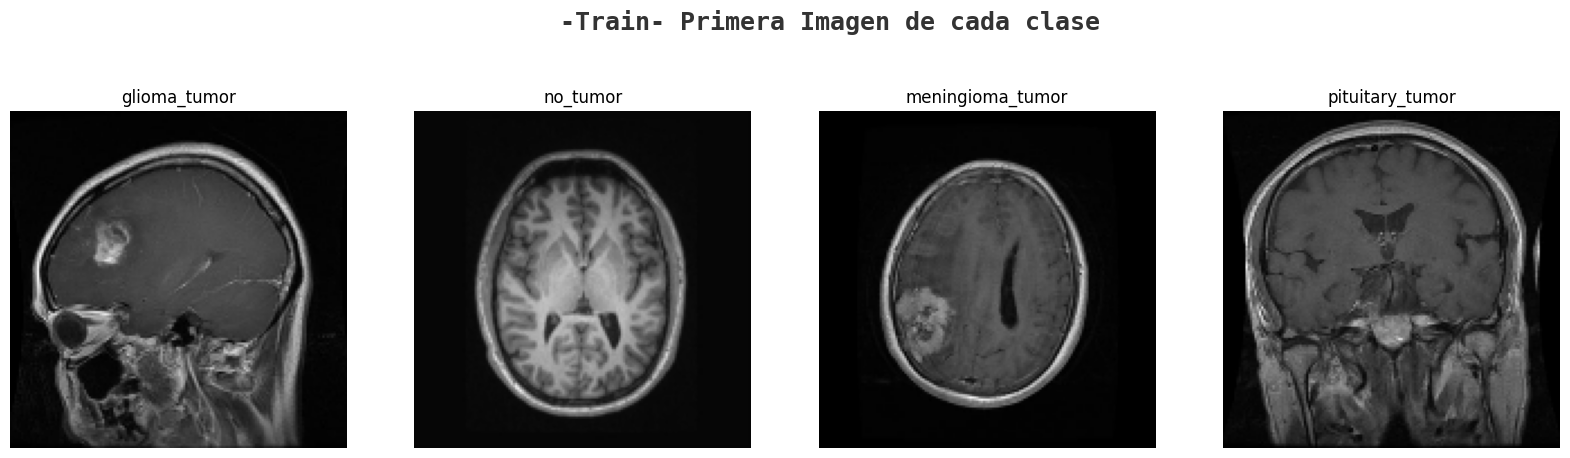

In [17]:
print_images_from_classes("-Train- Primera Imagen de cada clase",labels,X=X_train,y=y_train)

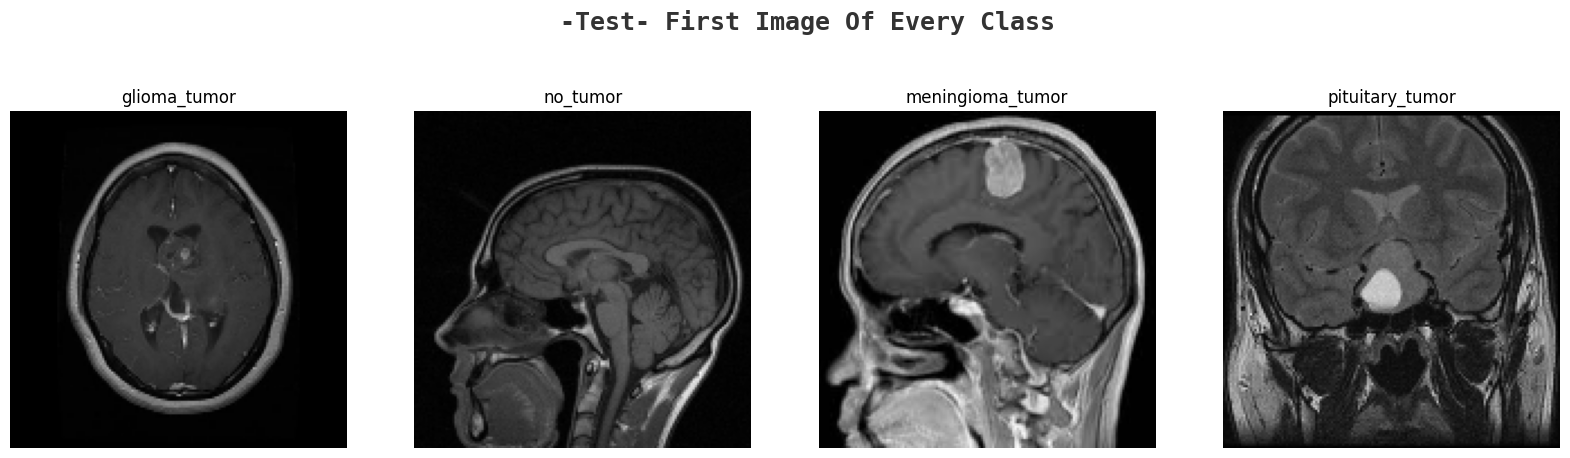

In [18]:
print_images_from_classes("-Test- First Image Of Every Class",labels,X=X_test,y=y_test)

In [19]:
#One-Hot Encoding del target value
y_train_encoded = [labels.index(i) for i in y_train]
y_train = y_train_encoded
y_train = tf.keras.utils.to_categorical(y_train)


y_test_encoded = [labels.index(i) for i in y_test]
y_test = y_test_encoded
y_test = tf.keras.utils.to_categorical(y_test)

**Transfer Learning** se enfoca en aplicar el conocimiento adquirido al resolver una tarea a una tarea relacionada.

En este caso EfficientNet es considerada la arquitectura de CNN mas poderosa desarrollado para datasets considerados como puntos de referencia en vision artificial.

Estos son los resultados de EfficientNet en U-Net, el metodo mas usado para segmentacion de imagenes.
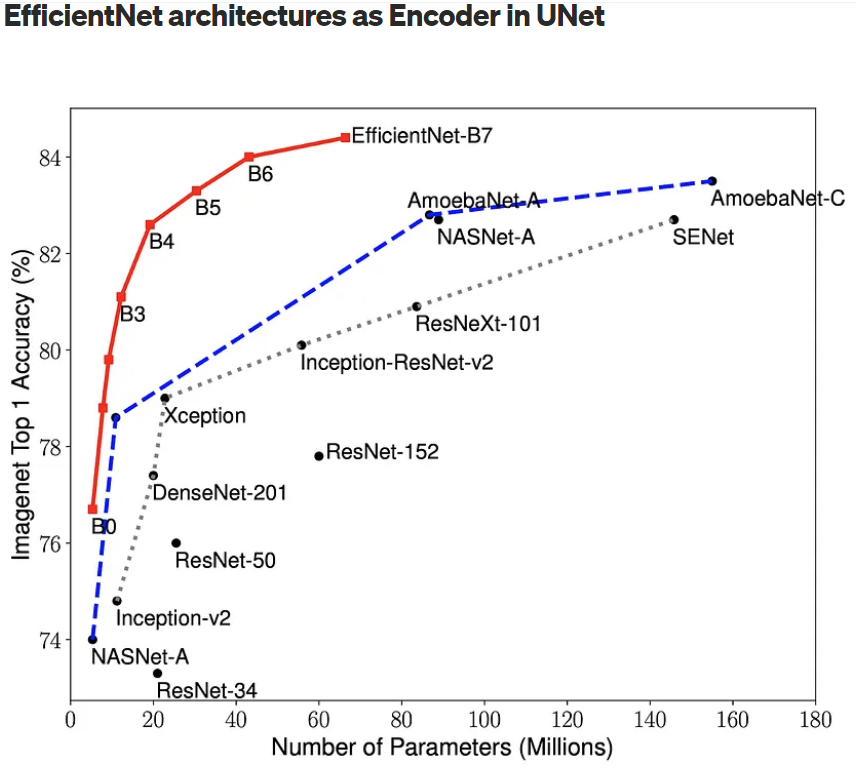


Y este el desempeño de cada modelo de efficientNet


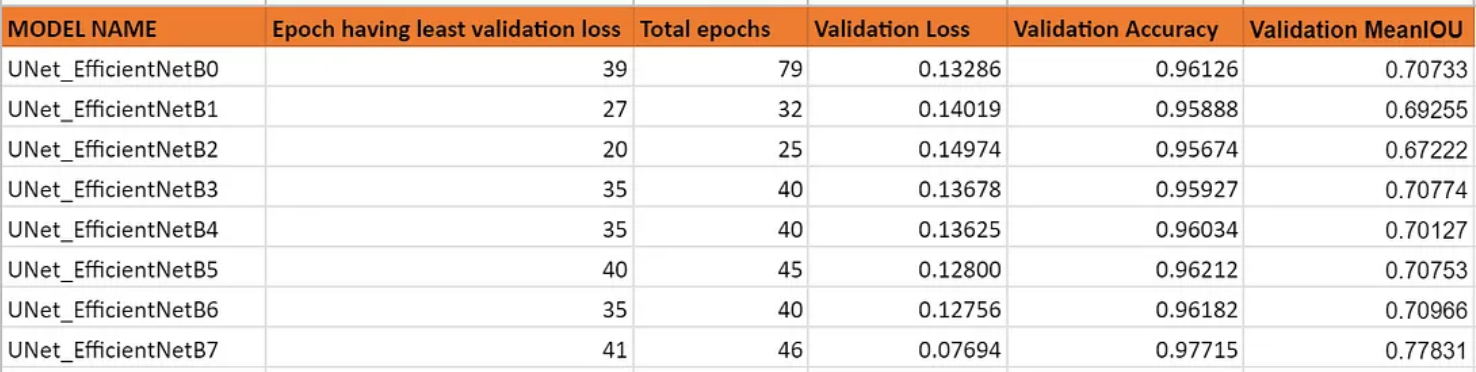

En este caso considerando un tradeoff entre complejidad del modelo y desempeño elegimos usar EfficientNetB2, la siguiente es una imagen de la arquitectura explicada en un alto nivel.

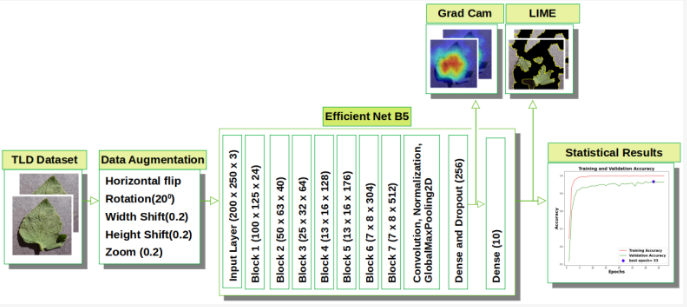

In [20]:
#Importing efficientnet weights as the foundation of our model
effnet = EfficientNetB2(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

#Callbacks (earlystopping, tensorboard, checkpoint, reduce_lr)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,verbose=1,restore_best_weights=True)
tensorboard = TensorBoard(log_dir = 'logs')
#checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
"""
Cant use checkpoint because versions of tensor_flow higher than 2.9.1 have problems auto serializing efficientNet
 TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.
"""
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

#MODEL
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

#Create the model
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

#Ploting Architecture
plot_model(model, to_file=effnet_arc_img_path, show_shapes=True, show_layer_names=True)

31790344/31790344 [==============================] - 7s 0us/step
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [21]:
# TRAINING
history = model.fit(X_train,y_train,validation_split=0.15, epochs =50, verbose=1, batch_size=32,
                   callbacks=[earlystopping,tensorboard,reduce_lr])

Epoch 1/50
78/78 [==============================] - 154s 2s/step - loss: 0.5207 - accuracy: 0.8125 - val_loss: 0.8471 - val_accuracy: 0.7891 - lr: 0.0010
Epoch 2/50
78/78 [==============================] - 150s 2s/step - loss: 0.2362 - accuracy: 0.9195 - val_loss: 0.2295 - val_accuracy: 0.9274 - lr: 0.0010
Epoch 3/50
78/78 [==============================] - 179s 2s/step - loss: 0.1500 - accuracy: 0.9491 - val_loss: 0.1447 - val_accuracy: 0.9456 - lr: 0.0010
Epoch 4/50
78/78 [==============================] - 282s 4s/step - loss: 0.1501 - accuracy: 0.9579 - val_loss: 0.2183 - val_accuracy: 0.9297 - lr: 0.0010
Epoch 5/50
78/78 [==============================] - ETA: 0s - loss: 0.0999 - accuracy: 0.9708
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
78/78 [==============================] - 321s 4s/step - loss: 0.0999 - accuracy: 0.9708 - val_loss: 1.0667 - val_accuracy: 0.7574 - lr: 0.0010
Epoch 6/50
66/78 [========================>.....] - ETA: 51s - loss: 0.

KeyboardInterrupt: 

In [ ]:
tf.saved_model.save(model, effnet_model_persistence_path)

In [ ]:
#Visualize performance of the model
filterwarnings('ignore')

epochs = list(range(13))
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color="#5B505E",y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor="#B4ABEB",color="#B3BCF5",
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor="#A89659",color="#F5E5B3",
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor="#B4ABEB",color="#B3BCF5",
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor="#A89659",color="#F5E5B3",
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [ ]:
#PREDICTION
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_encode = np.argmax(y_test,axis=1)

print(classification_report(y_test_encode,pred))

fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_encode,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=["#807C5E", "#BFB98E", '#E6DFAA', '#F0EBB6', '#FFF7BD'],alpha=0.7,linewidths=2,linecolor="#5B505E")
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color="#5B505E",y=0.92,x=0.28,alpha=0.8)

plt.show()

In [ ]:
img_pred(X_test,y_test,4,model)

# <p style="background-color:#ffffff;font-family:newtimeroman;color:#1a6282;font-size:150%;text-align:center;border-radius:40px 40px;">Construcción de modelo CNN con Keras</p>

In [ ]:
#Callbacks (earlystopping, tensorboard, checkpoint, reduce_lr)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,verbose=1,restore_best_weights=True)
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint(ann_persistence_path,monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)
#MODEL

ann = Sequential([
        tf.keras.layers.Flatten(input_shape=(image_size,image_size,3)),
        tf.keras.layers.Dense(3000, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])

#Create the model
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Ploting Architecture
plot_model(ann, to_file=ann_arc_img_path, show_shapes=True, show_layer_names=True)

In [ ]:
# TRAINING
history_ann = ann.fit(X_train,y_train,validation_split=0.15, epochs =50, verbose=1, batch_size=32,
                   callbacks=[earlystopping,tensorboard,reduce_lr,checkpoint])

In [ ]:
#Visualize performance of the model
filterwarnings('ignore')

epochs = list(range(17))
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history_ann.history['accuracy']
train_loss = history_ann.history['loss']
val_acc = history_ann.history['val_accuracy']
val_loss = history_ann.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color="#5B505E",y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor="#B4ABEB",color="#B3BCF5",
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor="#A89659",color="#F5E5B3",
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor="#B4ABEB",color="#B3BCF5",
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor="#A89659",color="#F5E5B3",
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [ ]:
#PREDICTION
pred = ann.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_encode = np.argmax(y_test,axis=1)

print(classification_report(y_test_encode,pred))

fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_encode,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=["#807C5E", "#BFB98E", '#E6DFAA', '#F0EBB6', '#FFF7BD'],alpha=0.7,linewidths=2,linecolor="#5B505E")
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color="#5B505E",y=0.92,x=0.28,alpha=0.8)

plt.show()

In [ ]:
img_pred(X_test,y_test,4,ann)